In [1]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import heapq

In [2]:
def print_plot(data: List[np.array], name: str, parameters: List[float]):
    for index, datum in enumerate(data):
        X = range(1, len(datum) + 1)
        Y = datum.tolist()
        plt.plot(X, Y, label=name.format(parameters[index]))
    plt.xlabel('place in line')
    plt.ylabel('awaitance time')
    plt.legend()
    plt.show()

In [3]:
def generate_samples(size: int, alpha: float) -> np.array:
    return np.sort(np.random.exponential(size=size, scale=alpha))
    
def conduct_experiment_a(iterations_amount:int, windows_amount:int, alpha:float):
    result = np.zeros(windows_amount)
    for i in range(0, iterations_amount):
        result += generate_samples(windows_amount, alpha)
    result /= iterations_amount
    return result

In [4]:
# a)
# Описание эксперимента: есть windows_amount окон, в которых уже обслуживаются клиенты, и очередь,
# состоящая из windows_amount людей.
# Время обслуживание одного клиента в окошке ~Exp(alpha). Одно окошко может обслужить только двух людей.
# Как только окошко освобождается, человек в порядке очереди проходит в него, после чего окошко закрывается.
# Хотим посмотреть на среднее выборочное ожидания в очереди в зависимости от порядка в ней

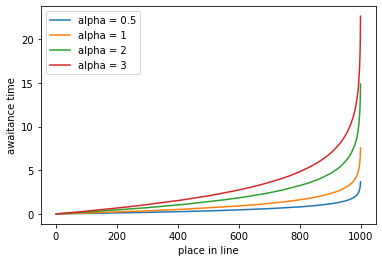

In [5]:
results = [conduct_experiment_a(iterations_amount=100, windows_amount=1000, alpha=0.5),
            conduct_experiment_a(iterations_amount=100, windows_amount=1000, alpha=1),
            conduct_experiment_a(iterations_amount=100, windows_amount=1000, alpha=2),
            conduct_experiment_a(iterations_amount=100, windows_amount=1000, alpha=3)]
print_plot(results, 'alpha = {}', [0.5, 1, 2, 3])

# Графики в зависимости от выбранного alpha

In [6]:
# Внимательный читатель заметит, что среднее время ожидания в очереди имеет экспоненциальный рост.
# Полученный результат можно обьяснить: в проведенном эксперементе время ожидания k-ого человека
# является k-ой порядковой статистикой, которая, в свою очередь, имеет эксп. распределение (практика)

In [7]:
def generate_queue(size: int, alpha: float) -> np.array:
    data = np.random.exponential(size=size, scale=alpha).tolist()
    heapq.heapify(data)
    return data

def update_queue(queue: List[float], alpha: float) -> float:
    minimum = heapq.heappop(queue)
    heapq.heappush(queue, minimum + np.random.exponential(alpha))
    return minimum

def conduct_iteration(crowd_size:int, windows_amount:int, alpha:int) -> np.array:
    queue = generate_queue(windows_amount, alpha)
    result = np.zeros(crowd_size)
    for person in range(0, crowd_size):
        result[person] = update_queue(queue, alpha)
    return result

def conduct_experiment_b(iterations_amount:int, windows_amount:int, crowd_size: int, alpha:float):
    result = np.zeros(crowd_size)
    for i in range(0, iterations_amount):
        result += conduct_iteration(crowd_size, windows_amount, alpha)
    result /= iterations_amount
    return result

In [317]:
# b)

# Условия эксперемента немного поменялись: теперь окошко может обслужить любое кол-во посетителей. Как следствие,
# Как следствие, кол-во людей в очереди задается отдельным параметром crowd_size.
# Цель все та же - рассмотреть среднее выборочное ожидание в зависимости от порядка в очереди

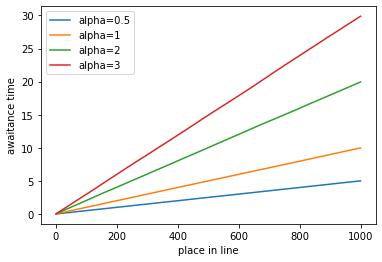

In [8]:
results = [conduct_experiment_b(iterations_amount=100, windows_amount=100, crowd_size=1000, alpha=0.5),
          conduct_experiment_b(iterations_amount=100, windows_amount=100, crowd_size=1000, alpha=1),
          conduct_experiment_b(iterations_amount=100, windows_amount=100, crowd_size=1000, alpha=2),
          conduct_experiment_b(iterations_amount=100, windows_amount=100, crowd_size=1000, alpha=3)]
print_plot(results, 'alpha={}',[0.5, 1, 2, 3])

# Графики в зависимости от параметра распределения alpha

In [327]:
# Как видно, время ожидания принимает линейную форму. Очень интересный результат.... 

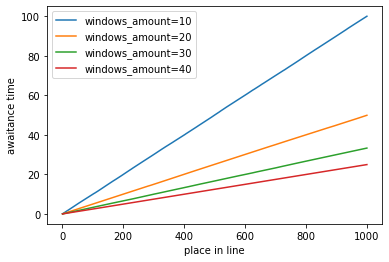

In [9]:
results = [conduct_experiment_b(iterations_amount=100, windows_amount=10, crowd_size=1000, alpha=1),
          conduct_experiment_b(iterations_amount=100, windows_amount=20, crowd_size=1000, alpha=1),
          conduct_experiment_b(iterations_amount=100, windows_amount=30, crowd_size=1000, alpha=1),
          conduct_experiment_b(iterations_amount=100, windows_amount=40, crowd_size=1000, alpha=1)]
print_plot(results, 'windows_amount={}', [10, 20, 30, 40])

# Графики в зависимости от кол-ва доступных окон